# Experiment 1: Image Classification

## Librairies

In [1]:
import torch
import numpy as np
import pylab as pl
import pandas as pd
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from src.ModelImageClassification import Net

c:\Users\lmmla\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\lmmla\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


## Data

### MNIST Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28, 28))
test_images = test_images.astype('float32')/255

### Fashion MNIST Dataset

In [3]:
(train_images_f, train_labels_f), (test_images_f, test_labels_f) = fashion_mnist.load_data()
train_images_f = train_images_f.reshape((60000, 28, 28))
train_images_f = train_images_f.astype('float32')/255
test_images_f = test_images_f.reshape((10000, 28, 28))
test_images_f = test_images_f.astype('float32')/255

### Preprocessing

In [4]:
N = 10000

# Data MNIST
X = torch.from_numpy(train_images[:N,]).float().view(N,1,28,28)
y = torch.from_numpy(train_labels[:N,]).float().to(torch.int64)
X_test = torch.from_numpy(test_images[:N,]).float().view(N,1,28,28)
y_test = torch.from_numpy(test_labels[:N,]).float().to(torch.int64)

# Data FASHION MNIST
Xf = torch.from_numpy(train_images_f[:N,]).float().view(N,1,28,28)
yf = torch.from_numpy(train_labels_f[:N,]).float().to(torch.int64)
Xf_test = torch.from_numpy(test_images_f[:N,]).float().view(N,1,28,28)
yf_test = torch.from_numpy(test_labels_f[:N,]).float().to(torch.int64)

C:\Users\lmmla\AppData\Local\Temp\ipykernel_9912\2540908872.py:11: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:212.)
  yf = torch.from_numpy(train_labels_f[:N,]).float().to(torch.int64)


## First Model : Convolutional Neural Network (CNN) - LeNet 5

In [74]:
list_algo = ['SGD', 'MOM', 'NAG', 'ADG', 'RMS', 'ADAM', 'AMS', 'NADAM', 'ADAMAX', 'NOSTA']

In [6]:
# Some definitions
categorical_cross_entropy = torch.nn.CrossEntropyLoss()

nb_epochs = 50
batch_size = 120
batches_per_epoch = 40

alpha = 0.1
beta = 0.9
epsilon = 1e-8

gamma = 0.999 # RMS Prop

rho = 0.95 # AdaDelta


beta1 = 0.9   # Adam
beta2 = 0.999 # Adam
alpha1 = 0.01

alpha2 = 0.001 # AMSGrad

## Performances of the Optimization Algorithms : MNIST Dataset

### Stochastic Gradient Descent (SGD)

In [7]:
model_ConvNN = Net()
L_sgd, A_sgd, Lt_sgd, At_sgd = model_ConvNN.training_SGD(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, alpha, verbose=True)
n = np.argmax(At_sgd)
lt_sgd, at_sgd = Lt_sgd[n].detach().item(), At_sgd[n].detach().item()

Launching SDG training of model
Number of parameters : 107786


Epoch 1 / 50 : Loss train = 2.2967751026153564 |Accu train = 0.09440000355243683 | Loss test = 2.2967355251312256 |Accu test = 0.09740000218153
Epoch 11 / 50 : Loss train = 0.21160776913166046 |Accu train = 0.9373000264167786 | Loss test = 0.2252373844385147 |Accu test = 0.9312999844551086
Epoch 21 / 50 : Loss train = 0.11180814355611801 |Accu train = 0.9666000008583069 | Loss test = 0.12941688299179077 |Accu test = 0.9588000178337097
Epoch 31 / 50 : Loss train = 0.07419329881668091 |Accu train = 0.9771000146865845 | Loss test = 0.09821253269910812 |Accu test = 0.9681000113487244
Epoch 41 / 50 : Loss train = 0.08898983895778656 |Accu train = 0.9721999764442444 | Loss test = 0.12794111669063568 |Accu test = 0.9605000019073486


### Momentum (MOM)

In [8]:
model_ConvNN = Net()
L_mom, A_mom, Lt_mom, At_mom = model_ConvNN.training_Mom(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, alpha, beta, verbose=True)
n = np.argmax(At_mom)
lt_mom, at_mom = Lt_mom[n].detach().item(), At_mom[n].detach().item()

Launching Momentum training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 2.2933430671691895 |Accu train = 0.20419999957084656 | Loss test = 2.294145345687866 |Accu test = 0.20069999992847443
Epoch 11 / 50 : Loss train = 0.2457164078950882 |Accu train = 0.9302999973297119 | Loss test = 0.25913357734680176 |Accu test = 0.9243000149726868
Epoch 21 / 50 : Loss train = 0.12760283052921295 |Accu train = 0.9620000123977661 | Loss test = 0.15092293918132782 |Accu test = 0.95169997215271
Epoch 31 / 50 : Loss train = 0.08446617424488068 |Accu train = 0.9739999771118164 | Loss test = 0.11125481128692627 |Accu test = 0.9660999774932861
Epoch 41 / 50 : Loss train = 0.06283078342676163 |Accu train = 0.9818000197410583 | Loss test = 0.10014156252145767 |Accu test = 0.9685999751091003


### Nesterov Accelerated Gradient (NAG)

In [9]:
model_ConvNN = Net()
L_nag, A_nag, Lt_nag, At_nag = model_ConvNN.training_NAG(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, alpha, beta, verbose=True)
n = np.argmax(At_nag)
lt_nag, at_nag = Lt_nag[n].detach().item(), At_nag[n].detach().item()

Launching NAG training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 2.2984375953674316 |Accu train = 0.11270000040531158 | Loss test = 2.299421787261963 |Accu test = 0.11349999904632568
Epoch 11 / 50 : Loss train = 0.26478278636932373 |Accu train = 0.926800012588501 | Loss test = 0.2842765152454376 |Accu test = 0.9172999858856201
Epoch 21 / 50 : Loss train = 0.11373255401849747 |Accu train = 0.9664000272750854 | Loss test = 0.13916917145252228 |Accu test = 0.9564999938011169
Epoch 31 / 50 : Loss train = 0.06939887255430222 |Accu train = 0.9800999760627747 | Loss test = 0.10187655687332153 |Accu test = 0.9696000218391418
Epoch 41 / 50 : Loss train = 0.04651116207242012 |Accu train = 0.9858999848365784 | Loss test = 0.08765913546085358 |Accu test = 0.9713000059127808


### AdaGrad

In [10]:
model_ConvNN = Net()
L_adg, A_adg, Lt_adg, At_adg = model_ConvNN.training_ADG(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, alpha, epsilon, verbose=True)
n = np.argmax(At_adg)
lt_adg, at_adg = Lt_adg[n].detach().item(), At_adg[n].detach().item()

Launching Ada Grad training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 2.279808282852173 |Accu train = 0.2757999897003174 | Loss test = 2.2801342010498047 |Accu test = 0.2824999988079071
Epoch 11 / 50 : Loss train = 0.1913154423236847 |Accu train = 0.944599986076355 | Loss test = 0.21011945605278015 |Accu test = 0.9363999962806702
Epoch 21 / 50 : Loss train = 0.10569363832473755 |Accu train = 0.968999981880188 | Loss test = 0.13029690086841583 |Accu test = 0.9596999883651733
Epoch 31 / 50 : Loss train = 0.0689115822315216 |Accu train = 0.9800000190734863 | Loss test = 0.097433902323246 |Accu test = 0.9690999984741211
Epoch 41 / 50 : Loss train = 0.07078632712364197 |Accu train = 0.979200005531311 | Loss test = 0.11148785054683685 |Accu test = 0.9646999835968018


### RMS Prop

In [11]:
model_ConvNN = Net()
L_rms, A_rms, Lt_rms, At_rms = model_ConvNN.training_RMS(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, alpha, gamma, epsilon, verbose=True)
n = np.argmax(At_rms)
lt_rms, at_rms = Lt_rms[n].detach().item(), At_rms[n].detach().item()

Launching RMS Prop training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 2.2884597778320312 |Accu train = 0.14139999449253082 | Loss test = 2.2889840602874756 |Accu test = 0.12880000472068787
Epoch 11 / 50 : Loss train = 0.16790372133255005 |Accu train = 0.9506999850273132 | Loss test = 0.1801127791404724 |Accu test = 0.9458000063896179
Epoch 21 / 50 : Loss train = 0.09299761056900024 |Accu train = 0.9718000292778015 | Loss test = 0.11928573995828629 |Accu test = 0.9616000056266785
Epoch 31 / 50 : Loss train = 0.08369170874357224 |Accu train = 0.9733999967575073 | Loss test = 0.111298106610775 |Accu test = 0.963699996471405
Epoch 41 / 50 : Loss train = 0.07915252447128296 |Accu train = 0.9764000177383423 | Loss test = 0.1151568591594696 |Accu test = 0.9660999774932861


### Adam

In [12]:
model_ConvNN = Net()
L_adam, A_adam, Lt_adam, At_adam = model_ConvNN.training_ADAM(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, alpha1, beta1, beta2, epsilon, verbose=True)
n = np.argmax(At_adam)
lt_adam, at_adam = Lt_adam[n].detach().item(), At_adam[n].detach().item()

Launching Adam training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 0.35830652713775635 |Accu train = 0.901199996471405 | Loss test = 0.3428265154361725 |Accu test = 0.894599974155426
Epoch 11 / 50 : Loss train = 0.07902538031339645 |Accu train = 0.9771999716758728 | Loss test = 0.12089604139328003 |Accu test = 0.9643999934196472
Epoch 21 / 50 : Loss train = 0.0441645048558712 |Accu train = 0.9855999946594238 | Loss test = 0.10332997888326645 |Accu test = 0.9685999751091003
Epoch 31 / 50 : Loss train = 0.025088004767894745 |Accu train = 0.9915000200271606 | Loss test = 0.1066732332110405 |Accu test = 0.9708999991416931
Epoch 41 / 50 : Loss train = 0.013697125017642975 |Accu train = 0.9961000084877014 | Loss test = 0.10767532885074615 |Accu test = 0.9745000004768372


### AMS Grad

In [13]:
model_ConvNN = Net()
L_ams, A_ams, Lt_ams, At_ams = model_ConvNN.training_AMS(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, alpha2, beta1, beta2, epsilon, verbose=True)
n = np.argmax(At_ams)
lt_ams, at_ams = Lt_ams[n].detach().item(), At_ams[n].detach().item()

Launching AMS Grad training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 0.3897375166416168 |Accu train = 0.8865000009536743 | Loss test = 0.40753817558288574 |Accu test = 0.8817999958992004
Epoch 11 / 50 : Loss train = 0.058984361588954926 |Accu train = 0.9821000099182129 | Loss test = 0.08940700441598892 |Accu test = 0.9728000164031982
Epoch 21 / 50 : Loss train = 0.036176081746816635 |Accu train = 0.9894000291824341 | Loss test = 0.06898543238639832 |Accu test = 0.9790999889373779
Epoch 31 / 50 : Loss train = 0.016413765028119087 |Accu train = 0.9957000017166138 | Loss test = 0.0679435208439827 |Accu test = 0.9819999933242798
Epoch 41 / 50 : Loss train = 0.010038009844720364 |Accu train = 0.9968000054359436 | Loss test = 0.0681396871805191 |Accu test = 0.9824000000953674


### Nadam

In [14]:
model_ConvNN = Net()
L_nadam, A_nadam, Lt_nadam, At_nadam = model_ConvNN.training_NADAM(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, 0.002, 0.99, 0.999, epsilon, verbose=True)
n = np.argmax(At_nadam)
lt_nadam, at_nadam = Lt_nadam[n].detach().item(), At_nadam[n].detach().item()

Launching Nadam training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 0.41589730978012085 |Accu train = 0.8952999711036682 | Loss test = 0.4405252933502197 |Accu test = 0.8799999952316284
Epoch 11 / 50 : Loss train = 0.06078550964593887 |Accu train = 0.9811999797821045 | Loss test = 0.10028313100337982 |Accu test = 0.9721999764442444
Epoch 21 / 50 : Loss train = 0.02226434089243412 |Accu train = 0.9940000176429749 | Loss test = 0.08079875260591507 |Accu test = 0.9782000184059143
Epoch 31 / 50 : Loss train = 0.011732491664588451 |Accu train = 0.996399998664856 | Loss test = 0.08727657794952393 |Accu test = 0.9782000184059143
Epoch 41 / 50 : Loss train = 0.005089229438453913 |Accu train = 0.9991000294685364 | Loss test = 0.1011921688914299 |Accu test = 0.9797000288963318


### Adamax

In [15]:
model_ConvNN = Net()
L_adamax, A_adamax, Lt_adamax, At_adamax = model_ConvNN.training_ADAMAX(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, 0.002, 0.95, 0.999, 0, epsilon, verbose=True)
n = np.argmax(At_adamax)
lt_adamax, at_adamax = Lt_adamax[n].detach().item(), At_adamax[n].detach().item()

Launching Adamax training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 0.514714777469635 |Accu train = 0.8449000120162964 | Loss test = 0.4987003803253174 |Accu test = 0.847599983215332
Epoch 11 / 50 : Loss train = 0.07445622235536575 |Accu train = 0.9785000085830688 | Loss test = 0.09832142293453217 |Accu test = 0.9710000157356262
Epoch 21 / 50 : Loss train = 0.04790499061346054 |Accu train = 0.9865999817848206 | Loss test = 0.08154366165399551 |Accu test = 0.973800003528595
Epoch 31 / 50 : Loss train = 0.033979035913944244 |Accu train = 0.9901999831199646 | Loss test = 0.07954856753349304 |Accu test = 0.9768999814987183
Epoch 41 / 50 : Loss train = 0.02370084635913372 |Accu train = 0.9926999807357788 | Loss test = 0.08567662537097931 |Accu test = 0.9775999784469604


### Nostalgic Adam

In [45]:
model_ConvNN = Net()
L_nos, A_nos, Lt_nos, At_nos = model_ConvNN.training_NOS(categorical_cross_entropy, X, y, X_test, y_test, nb_epochs, batch_size, batches_per_epoch, alpha=0.02, beta1=0.9, gamma=1e-4, epsilon=1e-8, verbose=True)
n = np.argmax(At_nos)
lt_nos, at_nos = Lt_nos[n].detach().item(), At_nos[n].detach().item()

Launching Nostalgic Adam training of model
Number of parameters : 107786
Epoch 11 / 50 : Loss train = 0.05590493232011795 | Accu train = 0.9835000038146973 | Loss test = 0.09519161283969879 | Accu test = 0.9700000286102295
Epoch 21 / 50 : Loss train = 0.039421916007995605 | Accu train = 0.988099992275238 | Loss test = 0.09306958317756653 | Accu test = 0.9714999794960022
Epoch 31 / 50 : Loss train = 0.026555301621556282 | Accu train = 0.9927999973297119 | Loss test = 0.09117856621742249 | Accu test = 0.9740999937057495
Epoch 41 / 50 : Loss train = 0.016903335228562355 | Accu train = 0.994700014591217 | Loss test = 0.09535849839448929 | Accu test = 0.9751999974250793
Epoch 51 / 50 : Loss train = 0.011847320944070816 | Accu train = 0.9970999956130981 | Loss test = 0.09966212511062622 | Accu test = 0.9753999710083008


## Plot Training 

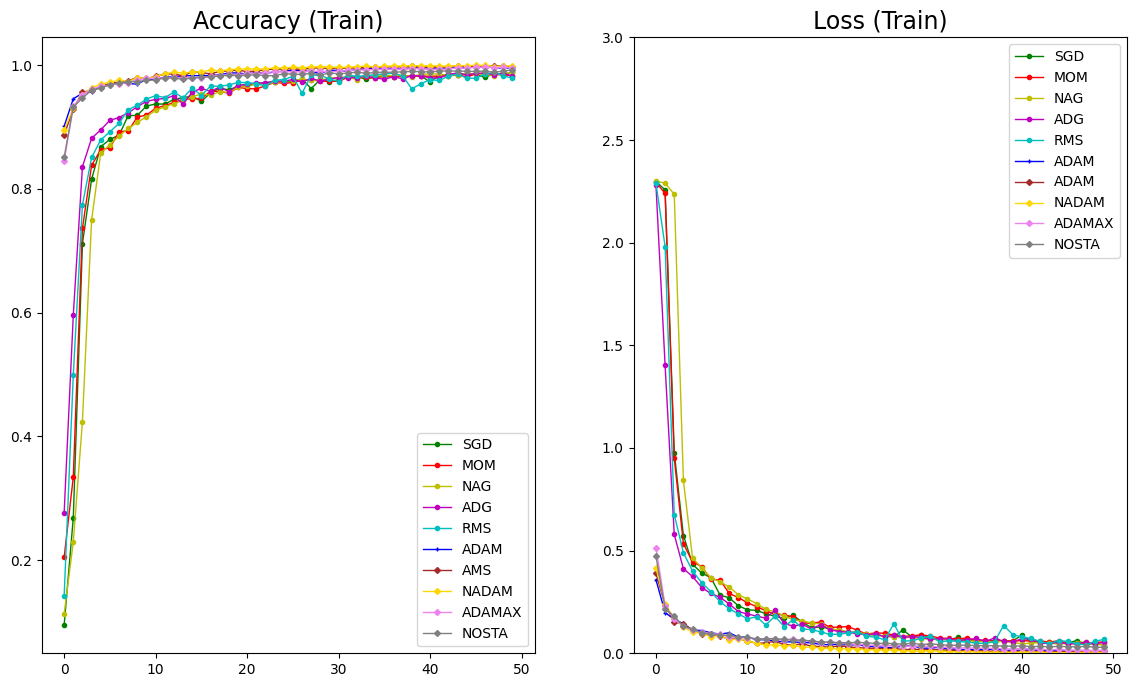

In [43]:
fig, ax = pl.subplots(1,2, figsize=(14,8))

ax[0].plot(A_sgd, 'go-', markersize=3, linewidth=1, label='SGD')
ax[0].plot(A_mom, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[0].plot(A_nag, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[0].plot(A_adg, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[0].plot(A_rms, 'co-', markersize=3, linewidth=1, label='RMS')
ax[0].plot(A_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[0].plot(A_ams, marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[0].plot(A_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[0].plot(A_adamax, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[0].plot(A_nos, marker='D', color='gray', markersize=3, linewidth=1, label='NOSTA')
ax[0].set_title("Accuracy (Train)", size=17)
ax[0].legend()

ax[1].plot(L_sgd, 'go-', markersize=3, linewidth=1, label='SGD')
ax[1].plot(L_mom, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[1].plot(L_nag, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[1].plot(L_adg, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[1].plot(L_rms, 'co-', markersize=3, linewidth=1, label='RMS')
ax[1].plot(L_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_ams, marker='D', color='brown', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[1].plot(L_adamax, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[1].plot(L_nos, marker='D', color='gray', markersize=3, linewidth=1, label='NOSTA')
ax[1].set_title("Loss (Train)", size=17)
ax[1].set_ylim(0,3)
ax[1].legend()

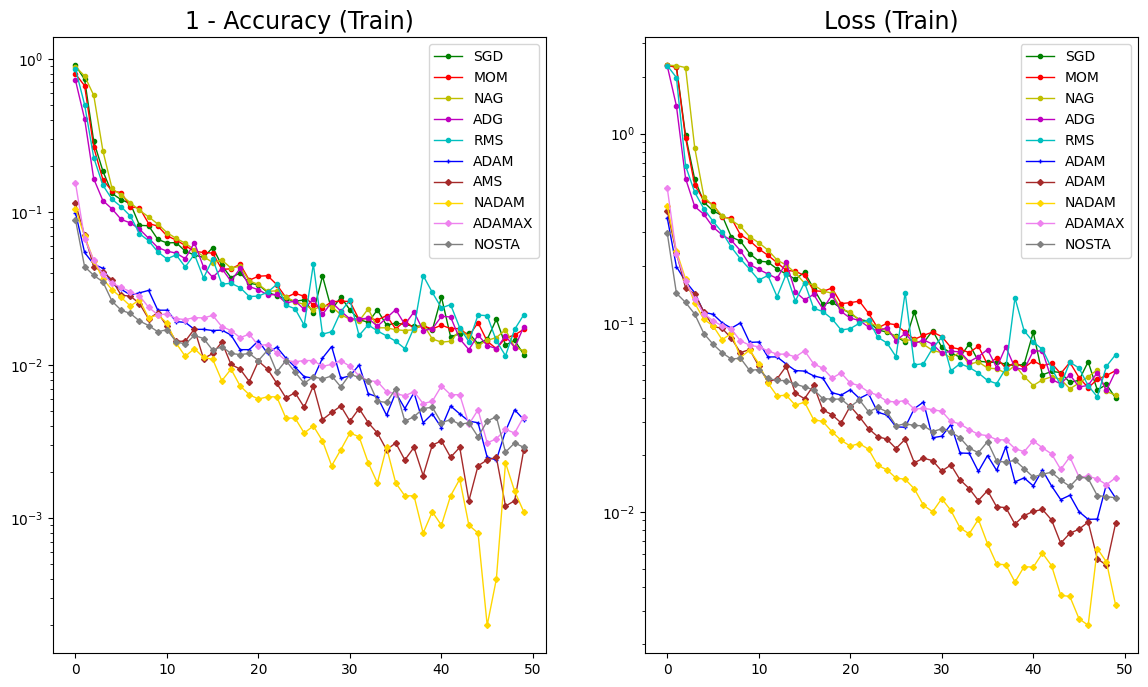

In [46]:
fig, ax = pl.subplots(1,2, figsize=(14,8))

ax[0].plot(1-np.array(A_sgd), 'go-', markersize=3, linewidth=1, label='SGD')
ax[0].plot(1-np.array(A_mom), 'ro-', markersize=3, linewidth=1, label='MOM')
ax[0].plot(1-np.array(A_nag), 'yo-', markersize=3, linewidth=1, label='NAG')
ax[0].plot(1-np.array(A_adg), 'mo-', markersize=3, linewidth=1, label='ADG')
ax[0].plot(1-np.array(A_rms), 'co-', markersize=3, linewidth=1, label='RMS')
ax[0].plot(1-np.array(A_adam), 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[0].plot(1-np.array(A_ams), marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[0].plot(1-np.array(A_nadam), marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[0].plot(1-np.array(A_adamax), marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[0].plot(1-np.array(A_nos), marker='D', color='gray', markersize=3, linewidth=1, label='NOSTA')
ax[0].set_title("1 - Accuracy (Train)", size=17)
ax[0].set_yscale('log')
ax[0].legend()

ax[1].plot(L_sgd, 'go-', markersize=3, linewidth=1, label='SGD')
ax[1].plot(L_mom, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[1].plot(L_nag, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[1].plot(L_adg, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[1].plot(L_rms, 'co-', markersize=3, linewidth=1, label='RMS')
ax[1].plot(L_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_ams, marker='D', color='brown', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[1].plot(L_adamax, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[1].plot(L_nos, marker='D', color='gray', markersize=3, linewidth=1, label='NOSTA')
ax[1].set_title("Loss (Train)", size=17)
ax[1].set_yscale('log')
ax[1].legend()

In [47]:
list_test_loss = [lt_sgd, lt_mom, lt_nag, lt_adg, lt_rms, lt_adam, lt_ams, lt_nadam, lt_adamax, lt_nos]
list_test_accu = [at_sgd, at_mom, at_nag, at_adg, at_rms, at_adam, at_ams, at_nadam, at_adamax, at_nos]
dico = {'Name':list_algo, 'Loss':list_test_loss, 'Accuracy':list_test_accu}
df_mnist = pd.DataFrame(dico)
df_mnist

,Name,Loss,Accuracy
0,SGD,0.083920,0.9740
1,MOM,0.083247,0.9735
2,NAG,0.087975,0.9731
3,ADG,0.082869,0.9761
4,RMS,0.088023,0.9744
5,ADAM,0.112146,0.9761
6,AMS,0.059157,0.9846
7,NADAM,0.103317,0.9805
8,ADAMAX,0.077648,0.9807
9,NOSTA,0.089678,0.9763


## Performances of the Optimization Algorithms : Fashion MNIST Dataset

In [56]:
# Some definitions

nb_epochs = 50
batch_size = 120
batches_per_epoch = 50

alpha = 0.1
beta = 0.9
epsilon = 1e-8

gamma = 0.999 # RMS Prop

rho = 0.95 # AdaDelta


beta1 = 0.9   # Adam
beta2 = 0.999 # Adam
alpha1 = 0.01

alpha2 = 0.002 # AMSGrad

### Stochastic Gradient Descent (SGD)

In [35]:
model_ConvNN = Net()
L_sgd_f, A_sgd_f, Lt_sgd_f, At_sgd_f = model_ConvNN.training_SGD(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, alpha, verbose=True)
n = np.argmax(At_sgd_f)
lt_sgd_f, at_sgd_f = Lt_sgd_f[n].detach().item(), At_sgd_f[n].detach().item()

Launching SDG training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 2.290010690689087 |Accu train = 0.14079999923706055 | Loss test = 2.2904791831970215 |Accu test = 0.13619999587535858
Epoch 11 / 50 : Loss train = 0.5618117451667786 |Accu train = 0.792900025844574 | Loss test = 0.5902816653251648 |Accu test = 0.7756999731063843
Epoch 21 / 50 : Loss train = 0.4309511184692383 |Accu train = 0.8410999774932861 | Loss test = 0.4911709129810333 |Accu test = 0.8208000063896179
Epoch 31 / 50 : Loss train = 0.41274750232696533 |Accu train = 0.8482999801635742 | Loss test = 0.4673386216163635 |Accu test = 0.8331000208854675
Epoch 41 / 50 : Loss train = 0.35323068499565125 |Accu train = 0.8662999868392944 | Loss test = 0.4373580515384674 |Accu test = 0.8456000089645386


### Stochastic Momentum (MOM)

In [36]:
model_ConvNN = Net()
L_mom_f, A_mom_f, Lt_mom_f, At_mom_f = model_ConvNN.training_Mom(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, alpha, beta, verbose=True)
n = np.argmax(At_mom_f)
lt_mom_f, at_mom_f = Lt_mom_f[n].detach().item(), At_mom_f[n].detach().item()

Launching Momentum training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 1.8762097358703613 |Accu train = 0.517300009727478 | Loss test = 1.8798226118087769 |Accu test = 0.5148000121116638
Epoch 11 / 50 : Loss train = 0.5421668887138367 |Accu train = 0.7961000204086304 | Loss test = 0.5791327953338623 |Accu test = 0.7793999910354614
Epoch 21 / 50 : Loss train = 0.45545586943626404 |Accu train = 0.8349999785423279 | Loss test = 0.521878182888031 |Accu test = 0.8093000054359436
Epoch 31 / 50 : Loss train = 0.3791239261627197 |Accu train = 0.8622000217437744 | Loss test = 0.4402560889720917 |Accu test = 0.8457000255584717
Epoch 41 / 50 : Loss train = 0.3313388228416443 |Accu train = 0.8766999840736389 | Loss test = 0.41358643770217896 |Accu test = 0.8547999858856201


### Nesterov Accelerated Gradient (NAG)

In [37]:
model_ConvNN = Net()
L_nag_f, A_nag_f, Lt_nag_f, At_nag_f = model_ConvNN.training_NAG(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, alpha, beta, verbose=True)
n = np.argmax(At_nag_f)
lt_nag_f, at_nag_f = Lt_nag_f[n].detach().item(), At_nag_f[n].detach().item()

Launching NAG training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 2.2938668727874756 |Accu train = 0.10220000147819519 | Loss test = 2.2940845489501953 |Accu test = 0.10000000149011612
Epoch 11 / 50 : Loss train = 0.514975368976593 |Accu train = 0.8090000152587891 | Loss test = 0.5625720620155334 |Accu test = 0.7918000221252441
Epoch 21 / 50 : Loss train = 0.4076860249042511 |Accu train = 0.8513000011444092 | Loss test = 0.4734151363372803 |Accu test = 0.8281999826431274
Epoch 31 / 50 : Loss train = 0.3599739968776703 |Accu train = 0.8651999831199646 | Loss test = 0.44033506512641907 |Accu test = 0.8403000235557556
Epoch 41 / 50 : Loss train = 0.30762043595314026 |Accu train = 0.8881000280380249 | Loss test = 0.40619704127311707 |Accu test = 0.8564000129699707


### AdaGrad (ADG)

In [72]:
model_ConvNN = Net()
L_adg_f, A_adg_f, Lt_adg_f, At_adg_f = model_ConvNN.training_ADG(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, alpha, epsilon, verbose=True)
n = np.argmax(At_adg_f)
lt_adg_f, at_adg_f = Lt_adg_f[n].detach().item(), At_adg_f[n].detach().item()

Launching Ada Grad training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 1.2467130422592163 |Accu train = 0.5206999778747559 | Loss test = 1.254884123802185 |Accu test = 0.5174000263214111
Epoch 11 / 50 : Loss train = 0.5535784959793091 |Accu train = 0.7982000112533569 | Loss test = 0.5989034175872803 |Accu test = 0.7763000130653381
Epoch 21 / 50 : Loss train = 0.48100078105926514 |Accu train = 0.8188999891281128 | Loss test = 0.5308932662010193 |Accu test = 0.8033000230789185
Epoch 31 / 50 : Loss train = 0.3964567184448242 |Accu train = 0.8522999882698059 | Loss test = 0.46495845913887024 |Accu test = 0.8317999839782715
Epoch 41 / 50 : Loss train = 0.3496004641056061 |Accu train = 0.8733999729156494 | Loss test = 0.4258664548397064 |Accu test = 0.8501999974250793


### RMS Prop (RMS)

In [71]:
model_ConvNN = Net()
L_rms_f, A_rms_f, Lt_rms_f, At_rms_f = model_ConvNN.training_RMS(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, alpha, gamma, epsilon, verbose=True)
n = np.argmax(At_rms_f)
lt_rms_f, at_rms_f = Lt_rms_f[n].detach().item(), At_rms_f[n].detach().item()

Launching RMS Prop training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 1.4987093210220337 |Accu train = 0.44130000472068787 | Loss test = 1.5211864709854126 |Accu test = 0.43140000104904175
Epoch 11 / 50 : Loss train = 0.5580302476882935 |Accu train = 0.7958999872207642 | Loss test = 0.5936111211776733 |Accu test = 0.7851999998092651
Epoch 21 / 50 : Loss train = 0.41435858607292175 |Accu train = 0.8511999845504761 | Loss test = 0.4823555052280426 |Accu test = 0.830299973487854
Epoch 31 / 50 : Loss train = 0.3456882834434509 |Accu train = 0.8737999796867371 | Loss test = 0.4258509874343872 |Accu test = 0.8482999801635742
Epoch 41 / 50 : Loss train = 0.3107670843601227 |Accu train = 0.8877999782562256 | Loss test = 0.42363032698631287 |Accu test = 0.8567000031471252


### Adam 

In [57]:
model_ConvNN = Net()
L_adam_f, A_adam_f, Lt_adam_f, At_adam_f = model_ConvNN.training_ADAM(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, alpha1, beta1, beta2, epsilon, verbose=True)
n = np.argmax(At_adam_f)
lt_adam_f, at_adam_f = Lt_adam_f[n].detach().item(), At_adam_f[n].detach().item()

Launching Adam training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 0.6378790736198425 |Accu train = 0.7558000087738037 | Loss test = 0.65813809633255 |Accu test = 0.7459999918937683
Epoch 11 / 50 : Loss train = 0.3502894937992096 |Accu train = 0.8677999973297119 | Loss test = 0.44540703296661377 |Accu test = 0.838100016117096
Epoch 21 / 50 : Loss train = 0.3070250451564789 |Accu train = 0.8815000057220459 | Loss test = 0.42810213565826416 |Accu test = 0.8468000292778015
Epoch 31 / 50 : Loss train = 0.2719108760356903 |Accu train = 0.8967999815940857 | Loss test = 0.41470927000045776 |Accu test = 0.8517000079154968
Epoch 41 / 50 : Loss train = 0.24989640712738037 |Accu train = 0.9025999903678894 | Loss test = 0.41421806812286377 |Accu test = 0.8597999811172485


### AMS Grad

In [54]:
model_ConvNN = Net()
L_ams_f, A_ams_f, Lt_ams_f, At_ams_f = model_ConvNN.training_AMS(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, alpha2, beta1, beta2, epsilon, verbose=True)
n = np.argmax(At_ams_f)
lt_ams_f, at_ams_f = Lt_ams_f[n].detach().item(), At_ams_f[n].detach().item()

Launching AMS Grad training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 0.6565998792648315 |Accu train = 0.7498999834060669 | Loss test = 0.6894637942314148 |Accu test = 0.739799976348877
Epoch 11 / 50 : Loss train = 0.3041212260723114 |Accu train = 0.8881999850273132 | Loss test = 0.4096897840499878 |Accu test = 0.8522999882698059
Epoch 21 / 50 : Loss train = 0.230851411819458 |Accu train = 0.9106000065803528 | Loss test = 0.3948843777179718 |Accu test = 0.8672000169754028
Epoch 31 / 50 : Loss train = 0.19246622920036316 |Accu train = 0.9272000193595886 | Loss test = 0.3801480829715729 |Accu test = 0.8707000017166138
Epoch 41 / 50 : Loss train = 0.16568957269191742 |Accu train = 0.9398000240325928 | Loss test = 0.39798808097839355 |Accu test = 0.8759999871253967


### Nadam

In [68]:
model_ConvNN = Net()
L_nadam_f, A_nadam_f, Lt_nadam_f, At_nadam_f = model_ConvNN.training_NADAM(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, 0.002, 0.99, 0.999, epsilon, verbose=True)
n = np.argmax(At_nadam_f)
lt_nadam_f, at_nadam_f = Lt_nadam_f[n].detach().item(), At_nadam_f[n].detach().item()

Launching Nadam training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 0.640571117401123 |Accu train = 0.7504000067710876 | Loss test = 0.6745990514755249 |Accu test = 0.7391999959945679
Epoch 11 / 50 : Loss train = 0.330098420381546 |Accu train = 0.8756999969482422 | Loss test = 0.4229804277420044 |Accu test = 0.8529999852180481
Epoch 21 / 50 : Loss train = 0.2651921510696411 |Accu train = 0.8980000019073486 | Loss test = 0.3853275775909424 |Accu test = 0.8687999844551086
Epoch 31 / 50 : Loss train = 0.22889307141304016 |Accu train = 0.9150999784469604 | Loss test = 0.38675329089164734 |Accu test = 0.8744999766349792
Epoch 41 / 50 : Loss train = 0.20522440969944 |Accu train = 0.9229000210762024 | Loss test = 0.395173043012619 |Accu test = 0.8788999915122986


### Adamax

In [30]:
model_ConvNN = Net()
L_adamax_f, A_adamax_f, Lt_adamax_f, At_adamax_f = model_ConvNN.training_ADAMAX(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, 0.002, 0.95, 0.999, 0, epsilon, verbose=True)
n = np.argmax(At_adamax_f)
lt_adamax_f, at_adamax_f = Lt_adamax_f[n].detach().item(), At_adamax_f[n].detach().item()

Launching Adamax training of model
Number of parameters : 107786
Epoch 1 / 50 : Loss train = 0.735049307346344 |Accu train = 0.736299991607666 | Loss test = 0.7682528495788574 |Accu test = 0.7208999991416931
Epoch 11 / 50 : Loss train = 0.3949587047100067 |Accu train = 0.8561000227928162 | Loss test = 0.4618276357650757 |Accu test = 0.8346999883651733
Epoch 21 / 50 : Loss train = 0.3140924572944641 |Accu train = 0.8838000297546387 | Loss test = 0.3943403661251068 |Accu test = 0.8600999712944031
Epoch 31 / 50 : Loss train = 0.2813167870044708 |Accu train = 0.8968999981880188 | Loss test = 0.371591180562973 |Accu test = 0.8707000017166138
Epoch 41 / 50 : Loss train = 0.2484360784292221 |Accu train = 0.9085999727249146 | Loss test = 0.36054351925849915 |Accu test = 0.876800000667572


### Nostalgic Adam

In [64]:
model_ConvNN = Net()
L_nos_f, A_nos_f, Lt_nos_f, At_nos_f = model_ConvNN.training_NOS(categorical_cross_entropy, Xf, yf, Xf_test, yf_test, nb_epochs, batch_size, batches_per_epoch, alpha=0.02, beta1=0.9, gamma=1e-4, epsilon=1e-8, verbose=True)
n = np.argmax(At_nos_f)
lt_nos_f, at_nos_f = Lt_nos_f[n].detach().item(), At_nos_f[n].detach().item()

Launching Nostalgic Adam training of model
Number of parameters : 107786
Epoch 11 / 50 : Loss train = 0.36557215452194214 | Accu train = 0.8618000149726868 | Loss test = 0.42773422598838806 | Accu test = 0.8432999849319458
Epoch 21 / 50 : Loss train = 0.31876087188720703 | Accu train = 0.8823000192642212 | Loss test = 0.4078895151615143 | Accu test = 0.8565999865531921
Epoch 31 / 50 : Loss train = 0.2825329005718231 | Accu train = 0.8934000134468079 | Loss test = 0.3904471695423126 | Accu test = 0.8634999990463257
Epoch 41 / 50 : Loss train = 0.2584875226020813 | Accu train = 0.902400016784668 | Loss test = 0.3856215476989746 | Accu test = 0.8690999746322632
Epoch 51 / 50 : Loss train = 0.24073342978954315 | Accu train = 0.9089999794960022 | Loss test = 0.3846885561943054 | Accu test = 0.871999979019165


## Plots

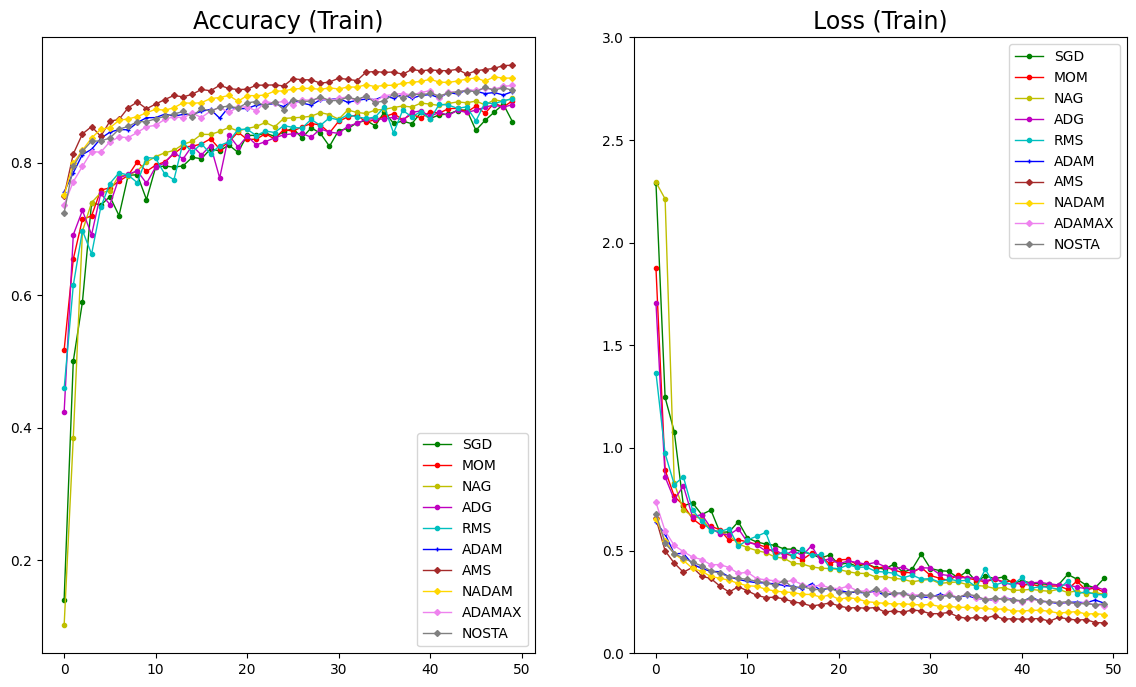

In [65]:
fig, ax = pl.subplots(1,2, figsize=(14,8))

ax[0].plot(A_sgd_f, 'go-', markersize=3, linewidth=1, label='SGD')
ax[0].plot(A_mom_f, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[0].plot(A_nag_f, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[0].plot(A_adg_f, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[0].plot(A_rms_f, 'co-', markersize=3, linewidth=1, label='RMS')
ax[0].plot(A_adam_f, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[0].plot(A_ams_f, marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[0].plot(A_nadam_f, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[0].plot(A_adamax_f, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[0].plot(A_nos_f, marker='D', color='gray', markersize=3, linewidth=1, label='NOSTA')
ax[0].set_title("Accuracy (Train)", size=17)
ax[0].legend()

ax[1].plot(L_sgd_f, 'go-', markersize=3, linewidth=1, label='SGD')
ax[1].plot(L_mom_f, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[1].plot(L_nag_f, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[1].plot(L_adg_f, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[1].plot(L_rms_f, 'co-', markersize=3, linewidth=1, label='RMS')
ax[1].plot(L_adam_f, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_ams_f, marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[1].plot(L_nadam_f, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[1].plot(L_adamax_f, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[1].plot(L_nos_f, marker='D', color='gray', markersize=3, linewidth=1, label='NOSTA')
ax[1].set_title("Loss (Train)", size=17)
ax[1].set_ylim(0,3)
ax[1].legend()

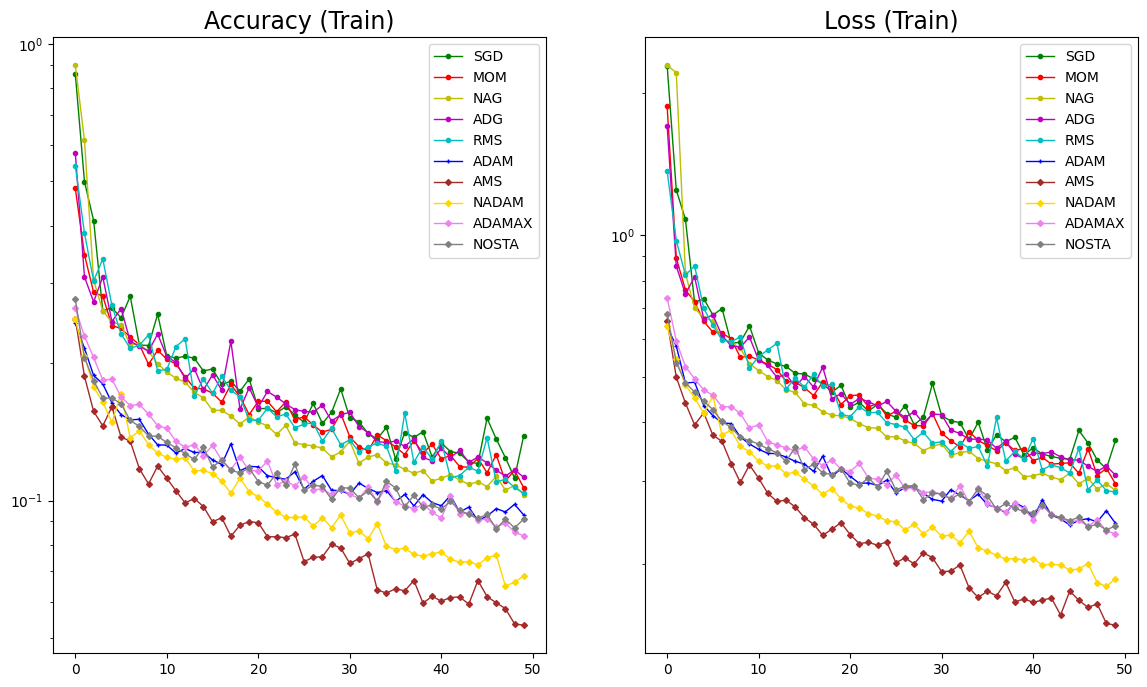

In [69]:
fig, ax = pl.subplots(1,2, figsize=(14,8))

ax[0].plot(1-np.array(A_sgd_f), 'go-', markersize=3, linewidth=1, label='SGD')
ax[0].plot(1-np.array(A_mom_f), 'ro-', markersize=3, linewidth=1, label='MOM')
ax[0].plot(1-np.array(A_nag_f), 'yo-', markersize=3, linewidth=1, label='NAG')
ax[0].plot(1-np.array(A_adg_f), 'mo-', markersize=3, linewidth=1, label='ADG')
ax[0].plot(1-np.array(A_rms_f), 'co-', markersize=3, linewidth=1, label='RMS')
ax[0].plot(1-np.array(A_adam_f), 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[0].plot(1-np.array(A_ams_f), marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[0].plot(1-np.array(A_nadam_f), marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[0].plot(1-np.array(A_adamax_f), marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[0].plot(1-np.array(A_nos_f), marker='D', color='gray', markersize=3, linewidth=1, label='NOSTA')
ax[0].set_title("Accuracy (Train)", size=17)
ax[0].set_yscale('log')
ax[0].legend()

ax[1].plot(L_sgd_f, 'go-', markersize=3, linewidth=1, label='SGD')
ax[1].plot(L_mom_f, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[1].plot(L_nag_f, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[1].plot(L_adg_f, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[1].plot(L_rms_f, 'co-', markersize=3, linewidth=1, label='RMS')
ax[1].plot(L_adam_f, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_ams_f, marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[1].plot(L_nadam_f, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[1].plot(L_adamax_f, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[1].plot(L_nos_f, marker='D', color='gray', markersize=3, linewidth=1, label='NOSTA')
ax[1].set_title("Loss (Train)", size=17)
ax[1].set_yscale('log')
ax[1].legend()

In [75]:
list_test_loss_f = [lt_sgd_f, lt_mom_f, lt_nag_f, lt_adg_f, lt_rms_f, lt_adam_f, lt_ams_f, lt_nadam_f, lt_adamax_f, lt_nos_f]
list_test_accu_f = [at_sgd_f, at_mom_f, at_nag_f, at_adg_f, at_rms_f, at_adam_f, at_ams_f, at_nadam_f, at_adamax_f, at_nos_f]
dico_f = {'Name':list_algo, 'Loss':list_test_loss_f, 'Accuracy':list_test_accu_f}
df_fashion_mnist = pd.DataFrame(dico_f)
df_fashion_mnist

,Name,Loss,Accuracy
0,SGD,0.407096,0.8567
1,MOM,0.395932,0.8657
2,NAG,0.407218,0.8631
3,ADG,0.412707,0.8557
4,RMS,0.407609,0.8615
5,ADAM,0.407077,0.8613
6,AMS,0.426442,0.8823
7,NADAM,0.389654,0.8809
8,ADAMAX,0.366803,0.8775
9,NOSTA,0.379346,0.8731
